In [1]:
# Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


In [2]:
# Read application_data csv file
# Create application DataFrame

app_data = "application_data.csv"
application = pd.read_csv(app_data)

In [3]:
# Read previous_application csv file
# Create previous DataFrame

previous_app_data = "previous_application.csv"
previous_app = pd.read_csv(previous_app_data)

In [4]:
# Create new application_data file for selected columns only

appdata = application[["SK_ID_CURR", 
                        "TARGET",
                        "NAME_CONTRACT_TYPE",
                        "CODE_GENDER",
                        "FLAG_OWN_CAR",
                        "FLAG_OWN_REALTY",
                        "CNT_CHILDREN",
                        "AMT_INCOME_TOTAL",
                        "AMT_CREDIT",
                        "AMT_ANNUITY",
                        "AMT_GOODS_PRICE",
                        "NAME_INCOME_TYPE",
                        "NAME_EDUCATION_TYPE",
                        "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE",
                        "REGION_POPULATION_RELATIVE",
                        "DAYS_BIRTH",
                        "OCCUPATION_TYPE",
                        "CNT_FAM_MEMBERS",
                        "REGION_RATING_CLIENT",
                        "WEEKDAY_APPR_PROCESS_START",
                        "ORGANIZATION_TYPE",
                        "OBS_30_CNT_SOCIAL_CIRCLE",
                        "DEF_30_CNT_SOCIAL_CIRCLE",
                        "OBS_60_CNT_SOCIAL_CIRCLE",
                        "DEF_60_CNT_SOCIAL_CIRCLE",
                        "AMT_REQ_CREDIT_BUREAU_MON",
                        "AMT_REQ_CREDIT_BUREAU_QRT",
                        "AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [5]:
# Rename applications data columns - before merge
# Add 'CURR' to the column heading to denote the original application_data file

clean_appdata = appdata.rename(columns={"TARGET": "CURR_TARGET",
                                        "NAME_CONTRACT_TYPE": "CURR_NAME_CONTRACT_TYPE",
                                        "CODE_GENDER": "CURR_CODE_GENDER",
                                        "FLAG_OWN_CAR": "CURR_FLAG_OWN_CAR",
                                        "FLAG_OWN_REALTY": "CURR_FLAG_OWN_REALTY",
                                        "CNT_CHILDREN": "CURR_CNT_CHILDREN",
                                        "AMT_INCOME_TOTAL": "CURR_AMT_INCOME_TOTAL",
                                        "AMT_CREDIT": "CURR_AMT_CREDIT",
                                        "AMT_ANNUITY": "CURR_AMT_ANNUITY",
                                        "AMT_GOODS_PRICE": "CURR_AMT_GOODS_PRICE",
                                        "NAME_INCOME_TYPE": "CURR_NAME_INCOME_TYPE",
                                        "NAME_EDUCATION_TYPE": "CURR_NAME_EDUCATION_TYPE",
                                        "NAME_FAMILY_STATUS": "CURR_NAME_FAMILY_STATUS",
                                        "NAME_HOUSING_TYPE": "CURR_NAME_HOUSING_TYPE",
                                        "REGION_POPULATION_RELATIVE": "CURR_REGION_POPULATION_RELATIVE",
                                        "DAYS_BIRTH": "CURR_DAYS_BIRTH",
                                        "OCCUPATION_TYPE": "CURR_OCCUPATION_TYPE",
                                        "CNT_FAM_MEMBERS": "CURR_CNT_FAM_MEMBERS",
                                        "REGION_RATING_CLIENT": "CURR_REGION_RATING_CLIENT",
                                        "WEEKDAY_APPR_PROCESS_START": "CURR_WEEKDAY_APPR_PROCESS_START",
                                        "ORGANIZATION_TYPE": "CURR_ORGANIZATION_TYPE",
                                        "OBS_30_CNT_SOCIAL_CIRCLE": "CURR_OBS_30_CNT_SOCIAL_CIRCLE",
                                        "DEF_30_CNT_SOCIAL_CIRCLE": "CURR_DEF_30_CNT_SOCIAL_CIRCLE",
                                        "OBS_60_CNT_SOCIAL_CIRCLE": "CURR_OBS_60_SOCIAL_CIRCLE",
                                        "DEF_60_CNT_SOCIAL_CIRCLE": "CURR_DEF_60_SOCIAL_CIRCLE",
                                        "AMT_REQ_CREDIT_BUREAU_MON": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_QRT": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_YEAR": "CURR_AMT_REQ_CREDIT_BUREAU_YEAR" 
                                       })

In [6]:
# Create previous_application_data file with with selected columns

prevdata = previous_app[["SK_ID_PREV",
                        "SK_ID_CURR",
                        "NAME_CONTRACT_TYPE",
                        "AMT_ANNUITY",
                        "AMT_APPLICATION",
                        "AMT_CREDIT",
                        "AMT_DOWN_PAYMENT",
                        "AMT_GOODS_PRICE",
                        "WEEKDAY_APPR_PROCESS_START",
                        "NFLAG_LAST_APPL_IN_DAY",
                        "NAME_CASH_LOAN_PURPOSE",
                        "NAME_CONTRACT_STATUS",
                        "DAYS_DECISION",
                        "CODE_REJECT_REASON",
                        "NAME_CLIENT_TYPE",
                        "NAME_GOODS_CATEGORY",
                        "NAME_PORTFOLIO",
                        "NAME_PRODUCT_TYPE",
                        "CHANNEL_TYPE",
                        "NAME_SELLER_INDUSTRY",
                        "NAME_YIELD_GROUP",
                        "PRODUCT_COMBINATION",
                        "DAYS_FIRST_DRAWING",
                        "DAYS_FIRST_DUE",
                        "DAYS_LAST_DUE_1ST_VERSION",
                        "DAYS_LAST_DUE",
                        "DAYS_TERMINATION",
                        "NFLAG_INSURED_ON_APPROVAL"]]

In [7]:
# Rename the columns for previous_application_data
# Add 'PREV' to the column heading to denote the original previous file

clean_prevdata = prevdata.rename(columns={"SK_ID_PREV": "PREV_SK_ID_PREV",
                                    "NAME_CONTRACT_TYPE": "PREV_NAME_CONTRACT_TYPE",
                                    "AMT_ANNUITY": "PREV_AMT_ANNUITY",
                                    "AMT_APPLICATION": "PREV_AMT_APPLICATION",
                                    "AMT_CREDIT": "PREV_AMT_CREDIT",
                                    "AMT_DOWN_PAYMENT": "PREV_AMT_DOWN_PAYMENT",
                                    "AMT_GOODS_PRICE": "PREV_AMT_GOODS_PRICE",
                                    "WEEKDAY_APPR_PROCESS_START": "PREV_WEEKDAY_APPR_PROCESS_START",
                                    "NFLAG_LAST_APPL_IN_DAY": "PREV_NFLAG_LAST_APPL_IN_DAY",
                                    "NAME_CASH_LOAN_PURPOSE": "PREV_NAME_CASH_LOAN_PURPOSE",
                                    "NAME_CONTRACT_STATUS": "PREV_NAME_CONTRACT_STATUS",
                                    "DAYS_DECISION": "PREV_DAYS_DECISION",
                                    "CODE_REJECT_REASON": "PREV_CODE_REJECT_REASON",
                                    "NAME_CLIENT_TYPE": "PREV_NAME_CLIENT",
                                    "NAME_GOODS_CATEGORY": "PREV_NAME_GOODS_CATEGORY",
                                    "NAME_PORTFOLIO": "PREV_NAME_PORTFOLIO",
                                    "NAME_PRODUCT_TYPE": "PREV_NAME_PRODUCT_TYPE",
                                    "CHANNEL_TYPE": "PREV_CHANNEL_TYPE",
                                    "NAME_SELLER_INDUSTRY": "PREV_NAME_SELLER_INDUSTRY",
                                    "NAME_YIELD_GROUP": "PREV_NAME_YIELD_GROUP",
                                    "PRODUCT_COMBINATION": "PREV_PRODUCT_COMBINATION",
                                    "DAYS_FIRST_DRAWING": "PREV_DAYS_FIRST_DRAWING",
                                    "DAYS_FIRST_DUE": "PREV_DAYS_FIRST_DUE",
                                    "DAYS_LAST_DUE_1ST_VERSION": "PREV_DAYS_LAST_DUE_1ST_VERSION",
                                    "DAYS_LAST_DUE": "PREV_DAYS_LAST_DUE",
                                    "DAYS_TERMINATION": "PREV_DAYS_TERMINATION",
                                    "NFLAG_INSURED_ON_APPROVAL": "PREV_NFLAG_INSURED_ON_APPROVAL"    
                                         })

In [8]:
# Create one dataframe
# Merge clean_appdata and clean_prevdata
loan_data = pd.merge(clean_appdata, clean_prevdata, on='SK_ID_CURR', how='inner')
loan_data.head()

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [9]:
# Check Unique SK_ID_CURR

sk_id_count = loan_data["SK_ID_CURR"].nunique()
print(sk_id_count)

291057


In [10]:
# Check for duplicates on SK_ID_CURR series
loan_data.loc[loan_data[['SK_ID_CURR']].duplicated(keep='first'), :]

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Country-wide,Consumer electronics,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Country-wide,Connectivity,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [11]:
# Create a clean DataFrame by dropping the duplicates on series SK_ID_CURR. Use .drop_duplicates()

clean_loan_data = loan_data.drop_duplicates(subset=['SK_ID_CURR'])

In [12]:
clean_loan_data.head()

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
14,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Regional / Local,Consumer electronics,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0


In [13]:
# View Column counts
# From this Column count - the series PREV_RATE_INTEREST_PRIMARY needs review. This column only has 1630 cells of data.
clean_loan_data.count()

SK_ID_CURR                         291057
CURR_TARGET                        291057
CURR_NAME_CONTRACT_TYPE            291057
CURR_CODE_GENDER                   291057
CURR_FLAG_OWN_CAR                  291057
CURR_FLAG_OWN_REALTY               291057
CURR_CNT_CHILDREN                  291057
CURR_AMT_INCOME_TOTAL              291057
CURR_AMT_CREDIT                    291057
CURR_AMT_ANNUITY                   291045
CURR_AMT_GOODS_PRICE               290790
CURR_NAME_INCOME_TYPE              291057
CURR_NAME_EDUCATION_TYPE           291057
CURR_NAME_FAMILY_STATUS            291057
CURR_NAME_HOUSING_TYPE             291057
CURR_REGION_POPULATION_RELATIVE    291057
CURR_DAYS_BIRTH                    291057
CURR_OCCUPATION_TYPE               199817
CURR_CNT_FAM_MEMBERS               291057
CURR_REGION_RATING_CLIENT          291057
CURR_WEEKDAY_APPR_PROCESS_START    291057
CURR_ORGANIZATION_TYPE             291057
CURR_OBS_30_CNT_SOCIAL_CIRCLE      290283
CURR_DEF_30_CNT_SOCIAL_CIRCLE     

In [14]:
# Calculate loan applicant age based on CURR_DAYS_BIRTH series
# Add column for AGE
clean_loan_data['CURR_DAYS_BIRTH'].astype(float)
age = clean_loan_data['CURR_DAYS_BIRTH'] / -365
clean_loan_data['AGE'] = round(clean_loan_data['CURR_DAYS_BIRTH'] / -365, 0)

C:\Users\crism\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
# Create Bins for Age
bins = [20, 31, 40, 50, 60, 70]
group_names = ["< 30", "31-40", "41-50", "51-60", "61 +"]

clean_loan_data["AGE RANGE"] = pd.cut(clean_loan_data["AGE"], bins, labels=group_names, include_lowest=True)


C:\Users\crism\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# Save file as csv
# clean_loan_data.to_csv("Output/cleanloandata.csv", index=False)

In [17]:
# Create a DataFrame with CURR_AMT_CREDIT (loan amount) with Age Ranges, regardless of approvals
age_data = clean_loan_data[["SK_ID_CURR", 
                            "CURR_AMT_INCOME_TOTAL",
                            "CURR_AMT_CREDIT",
                            "CURR_AMT_ANNUITY",
                            "AGE",
                            "AGE RANGE"]]
age_data.head()

,SK_ID_CURR,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,AGE,AGE RANGE
0,100002,202500.0,406597.5,24700.5,26.0,< 30
1,100003,270000.0,1293502.5,35698.5,46.0,41-50
4,100004,67500.0,135000.0,6750.0,52.0,51-60
5,100006,135000.0,312682.5,29686.5,52.0,51-60
14,100007,121500.0,513000.0,21865.5,55.0,51-60


In [18]:
# Create Age Range Summary of Totals Applicants Per age and income level and loan amount
# Groupby Age Range
age_count_df = age_data.groupby(["AGE RANGE"])
tot_age_count = age_count_df["SK_ID_CURR"].nunique()

# Average Loan Amount by Age
avg_loan_by_age = round(age_count_df["CURR_AMT_CREDIT"].mean(),0)

# Average Income Amount by Age
avg_income_by_age = round(age_count_df["CURR_AMT_INCOME_TOTAL"].mean(),0)

# Summary Data Frame of Age Range

age_summary = pd.DataFrame({"Loan Applicant Count by Age": tot_age_count,
                           "Average Income": avg_income_by_age,
                           "Average Loan Amount": avg_loan_by_age})
age_summary

,Loan Applicant Count by Age,Average Income,Average Loan Amount
AGE RANGE,,,
< 30,53288,160153.0,483478.0
31-40,70885,177234.0,598472.0
41-50,71850,178797.0,652040.0
51-60,64306,162919.0,639730.0
61 +,30728,137447.0,514612.0


In [19]:
# For Scatter Plot DataFrame - Need Age Only and not Age Range for Plotting
age_only = clean_loan_data[["SK_ID_CURR", 
                            "CURR_AMT_INCOME_TOTAL",
                            "CURR_AMT_CREDIT",
                            "CURR_AMT_ANNUITY",
                            "AGE"]]
age_only.head()

,SK_ID_CURR,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,AGE
0,100002,202500.0,406597.5,24700.5,26.0
1,100003,270000.0,1293502.5,35698.5,46.0
4,100004,67500.0,135000.0,6750.0,52.0
5,100006,135000.0,312682.5,29686.5,52.0
14,100007,121500.0,513000.0,21865.5,55.0


In [20]:
# Change data type for AGE series, for groupby function
age_only['AGE'].astype('category')

0          26.0
1          46.0
4          52.0
5          52.0
14         55.0
           ... 
1413687    26.0
1413688    57.0
1413689    41.0
1413691    33.0
1413693    46.0
Name: AGE, Length: 291057, dtype: category
Categories (49, float64): [21.0, 22.0, 23.0, 24.0, ..., 66.0, 67.0, 68.0, 69.0]

In [21]:
# Create Age Only Summary for Scatter Plot
agecount = age_only.groupby(["AGE"])
totagecount = agecount["AGE"].nunique()

# Average Loan Amount by Age
avgloan = round(agecount["CURR_AMT_CREDIT"].mean(),0)

# Average Income Amount by Age
avgincome = round(agecount["CURR_AMT_INCOME_TOTAL"].mean(),0)

# Summary Data Frame of Age Range

age_only_summary = pd.DataFrame({"Average Income by Age Group": avgincome,
                           "Average Loan Amount by Age Group": avgloan})
age_only_summary

,Average Income by Age Group,Average Loan Amount by Age Group
AGE,,
21.0,118494.0,232053.0
22.0,133040.0,346190.0
23.0,145010.0,417611.0
24.0,149373.0,425487.0
25.0,154627.0,438375.0
26.0,156833.0,460717.0
27.0,160288.0,486419.0
28.0,162030.0,492819.0
29.0,165848.0,511979.0


In [22]:
# Reset age_only_summary dataframe Index for scatter plot

age_only_summary.reset_index(level=0, inplace=True)
age_only_summary

,AGE,Average Income by Age Group,Average Loan Amount by Age Group
0,21.0,118494.0,232053.0
1,22.0,133040.0,346190.0
2,23.0,145010.0,417611.0
3,24.0,149373.0,425487.0
4,25.0,154627.0,438375.0
5,26.0,156833.0,460717.0
6,27.0,160288.0,486419.0
7,28.0,162030.0,492819.0
8,29.0,165848.0,511979.0
9,30.0,169070.0,525107.0


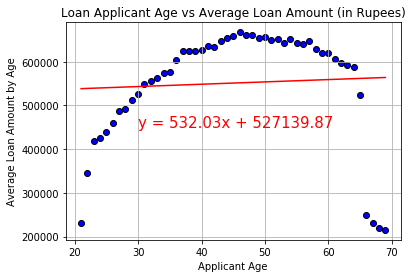

----------------------------------------------------------------------------------
Obeservation: Average loan increased with age.
Obeservation: At about age 55, the average loans decrease with an increase in age.


In [23]:
# CORRELATION AND REGRESSION LINE
# Generate a scatter plot age vs average loan amount
x_values = age_only_summary["AGE"]
y_values = age_only_summary["Average Loan Amount by Age Group"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(30,450000), fontsize=15, color='red')
plt.title("Loan Applicant Age vs Average Loan Amount (in Rupees)")
plt.xlabel("Applicant Age")
plt.ylabel("Average Loan Amount by Age")
plt.grid()
plt.show()

print('----------------------------------------------------------------------------------')
print("Obeservation: Average loan increased with age.")
print("Obeservation: At about age 55, the average loans decrease with an increase in age.")

In [24]:
# Save Scatter Plot image
plt.tight_layout()
plt.savefig("Images/AgeAvgLoan.png")
plt.show()

<Figure size 432x288 with 0 Axes>